In [63]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
url = "https://en.wikipedia.org/wiki/Comparison_of_North_American_ski_resorts"
email = "wella2@byu.edu"
ua = f"STAT386-class-scraper/1.0 (+{email})"

r = requests.get(url, headers={"User-Agent": ua}, timeout=15)
r.raise_for_status()

tables = pd.read_html(r.text)

for i, t in enumerate(tables):
    print(i, t.shape)


0 (4, 2)
1 (1, 2)
2 (1, 2)
3 (1, 2)
4 (509, 11)


/var/folders/f4/ftsj1j7n5837rlz4_q0rks500000gn/T/ipykernel_19113/2635439023.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(r.text)


In [59]:
url = "https://en.wikipedia.org/wiki/Comparison_of_North_American_ski_resorts"

email = "wella2@byu.edu"
ua = f"STAT386-class-scraper/1.0 (+{email})"

# Fetch page
r = requests.get(
    url,
    headers={"User-Agent": ua, "From": email},
    timeout=15
)
r.raise_for_status()

# Extract all tables
tables = pd.read_html(r.text)

# Take the first table
df = tables[4]

df.head()


/var/folders/f4/ftsj1j7n5837rlz4_q0rks500000gn/T/ipykernel_19113/630745750.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(r.text)


,Resort name and website,Nearest city,State/province,Peak elevation (ft),Base elevation (ft),Vertical drop (ft),Skiable acreage,Total trails,Total lifts,Average annual snowfall (in),Date statistics updated
0,Ski Bromont,Bromont,Quebec,1854,590,1264,450,141.0,9.0,190,"January 29, 2025"
1,Apex Mountain Resort,Penticton,British Columbia,7197,5197,2000,1112,79.0,4.0,236,"January 29, 2025[1]"
2,Canyon Ski Area,Red Deer,Alberta,2950,2412,538,80,23.0,6.0,45,"January 29, 2025"
3,Fernie Alpine Resort,Fernie,British Columbia,7000,3450,3550,2500,142.0,10.0,360,"January 29, 2025[2]"
4,Marble Mountain Ski Resort,Steady Brook,Newfoundland and Labrador,1791,33,1759,285,40.0,5.0,192,"January 29, 2025"


In [60]:
# Making a CSV file
df.to_csv("ski_resorts.csv", index=False)

In [61]:
#### Cleaning up the data ####

# Remove last column
df = df.iloc[:, :-1]

# Rename columns
df.columns = ["Resort Name", "Nearest City", "State/Province", "Peak Elevation (ft)", "Base Elevation (ft)", 
              "Vertical Drop (ft)", "Skiable Area (acres)", "Total Trails", 
              "Total Lifts", "Average Annual Snowfall (inches)"]

# Remove rows with missing Annual Snowfall
df = df[df["Average Annual Snowfall (inches)"].notna()]

# Removing brackets and their contents from string columns
def remove_brackets(text):
    if pd.isna(text):
        return text
    return re.sub(r'\[.*?\]', '', str(text)).strip()

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].apply(remove_brackets)


# Cleaning numeric columns
def clean_numeric(val):
    if pd.isna(val):
        return np.nan
    val = str(val)
    val = re.sub(r'[^\d.]', '', val)  # remove everything except digits and dot
    if val == '':
        return np.nan
    return float(val)

numeric_cols = ['Top Elevation', 'Base Elevation', 'Vertical', 'Skiable Area', 
                'Number of Trails', 'Number of Lifts', 'Longest Run']

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].apply(clean_numeric)

# Clean categorial columns
df['Resort Name'] = df['Resort Name'].str.strip()
df['Nearest City'] = df['Nearest City'].str.strip()
df['State/Province'] = df['State/Province'].str.strip()

df.head()

,Resort Name,Nearest City,State/Province,Peak Elevation (ft),Base Elevation (ft),Vertical Drop (ft),Skiable Area (acres),Total Trails,Total Lifts,Average Annual Snowfall (inches)
0,Ski Bromont,Bromont,Quebec,1854,590,1264,450,141.0,9.0,190
1,Apex Mountain Resort,Penticton,British Columbia,7197,5197,2000,1112,79.0,4.0,236
2,Canyon Ski Area,Red Deer,Alberta,2950,2412,538,80,23.0,6.0,45
3,Fernie Alpine Resort,Fernie,British Columbia,7000,3450,3550,2500,142.0,10.0,360
4,Marble Mountain Ski Resort,Steady Brook,Newfoundland and Labrador,1791,33,1759,285,40.0,5.0,192


<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 464
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Resort Name                       398 non-null    object 
 1   Nearest City                      398 non-null    object 
 2   State/Province                    398 non-null    object 
 3   Peak Elevation (ft)               393 non-null    object 
 4   Base Elevation (ft)               393 non-null    object 
 5   Vertical Drop (ft)                398 non-null    object 
 6   Skiable Area (acres)              391 non-null    float64
 7   Total Trails                      393 non-null    float64
 8   Total Lifts                       393 non-null    float64
 9   Average Annual Snowfall (inches)  398 non-null    int64  
 10  Region                            398 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 37.3+ KB


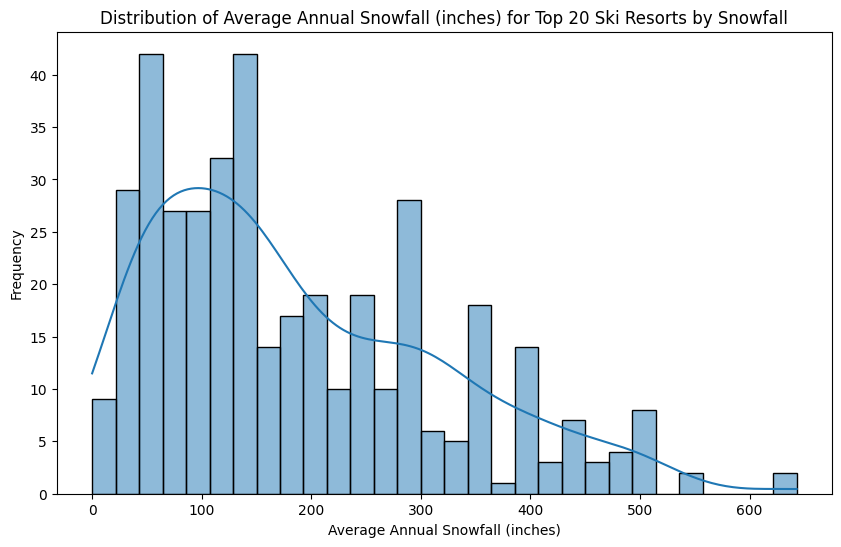

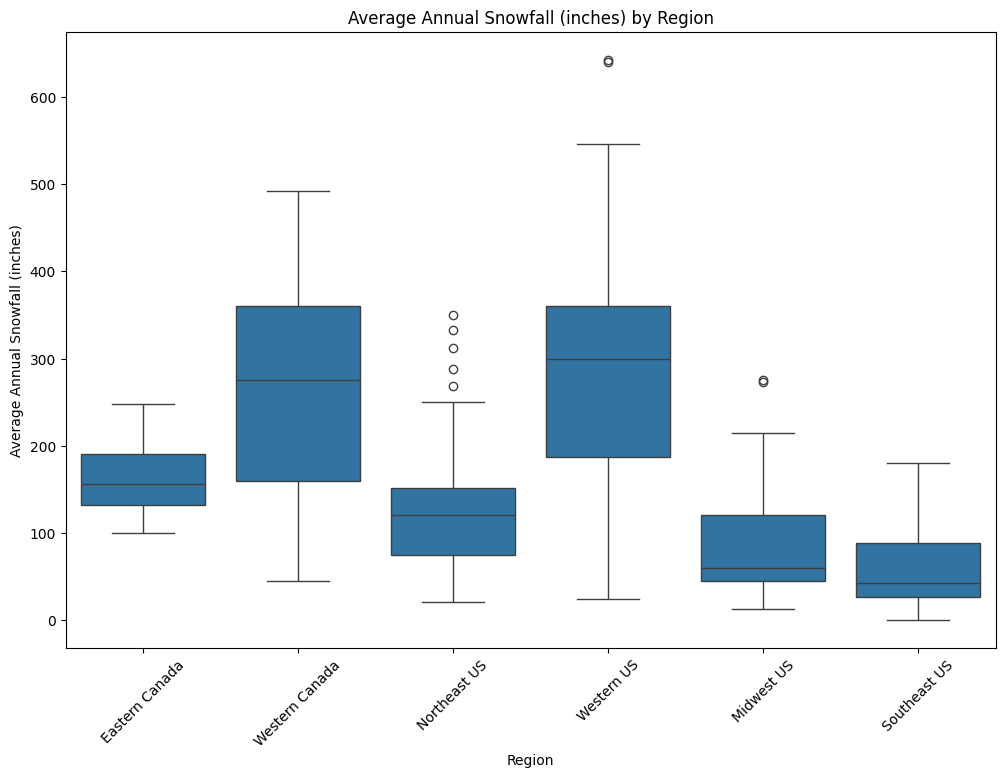

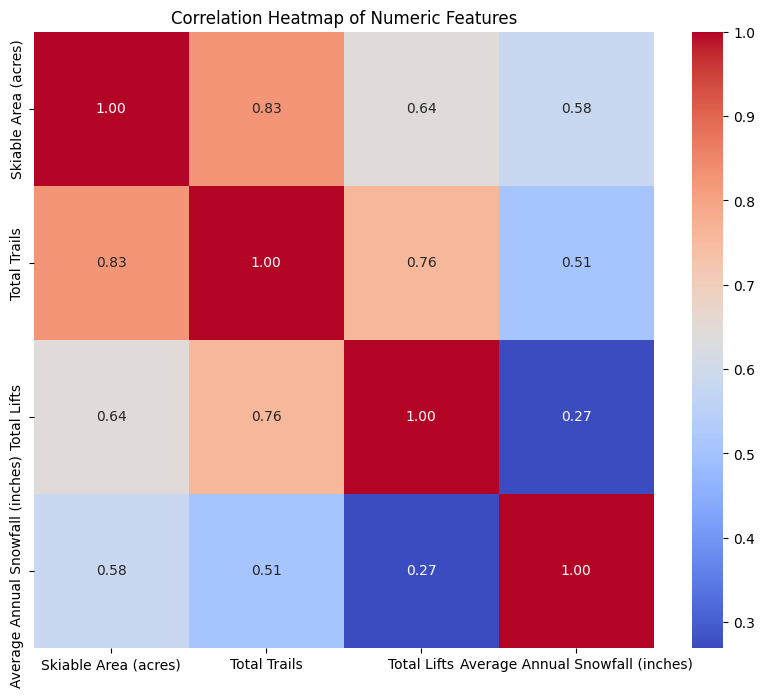

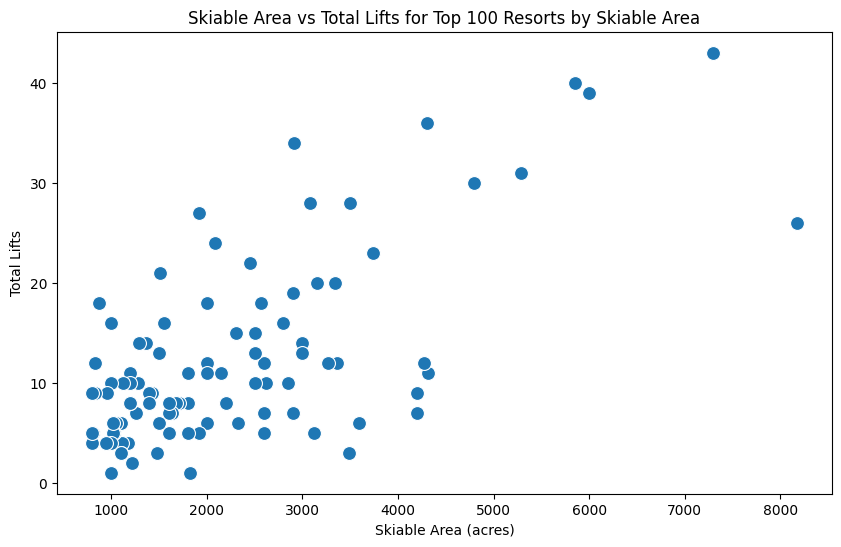

In [89]:
#### EDA ####

df.describe()
df.info()

# Plot distribution of Average Annual Snowfall with filter for top 20

# Converting 'Average Annual Snowfall (inches)' to numeric
df["Average Annual Snowfall (inches)"] = pd.to_numeric(df["Average Annual Snowfall (inches)"], errors="coerce")

top_20_snowfall = df.nlargest(20, 'Average Annual Snowfall (inches)')
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Annual Snowfall (inches)'].dropna(), bins=30, kde=True)
plt.title('Distribution of Average Annual Snowfall (inches) for Top 20 Ski Resorts by Snowfall')
plt.xlabel('Average Annual Snowfall (inches)')
plt.ylabel('Frequency')
plt.show()

# Annual Snowfall by State/Province
# Grouping State/Province by geographic regions
state_region_map = {
    'Quebec': 'Eastern Canada',
    'British Columbia': 'Western Canada', 
    'Alberta': 'Western Canada',
    'Newfoundland and Labrador': 'Eastern Canada',
    'Nova Scotia': 'Eastern Canada',
    'Vermont': 'Northeast US',
    'Colorado': 'Western US',
    'Wyoming': 'Western US', 
    'Nevada': 'Western US', 
    'Idaho': 'Western US', 
    'Montana': 'Western US', 
    'Arizona': 'Western US', 
    'New Mexico': 'Western US',
    'Oregon': 'Western US', 
    'California': 'Western US', 
    'Alaska': 'Western US', 
    'Maine': 'Northeast US', 
    'Michigan': 'Midwest US',
    'New Jersey': 'Northeast US', 
    'Ontario': 'Eastern Canada', 
    'Utah': 'Western US', 
    'New York': 'Northeast US', 
    'West Virginia': 'Southeast US',
    'Washington': 'Western US', 
    'North Carolina': 'Southeast US', 
    'South Dakota': 'Midwest US', 
    'Virginia': 'Southeast US',
    'North Dakota': 'Midwest US', 
    'Connecticut': 'Northeast US', 
    'Rhode Island': 'Northeast US', 
    'Missouri': 'Midwest US',
    'Tennessee': 'Southeast US', 
    'Indiana': 'Midwest US', 
    'Ohio': 'Midwest US', 
    'Maryland': 'Southeast US', 
    'Massachusetts': 'Northeast US',
    'Illinois': 'Midwest US', 
    'Iowa': 'Midwest US', 
    'Alabama': 'Southeast US', 
    'Minnesota': 'Midwest US', 
    'New Hampshire': 'Northeast US',
    'Pennsylvania': 'Northeast US', 
    'Wisconsin': 'Midwest US'
}
df["Region"] = df["State/Province"].map(state_region_map)

plt.figure(figsize=(12, 8))
sns.boxplot(
    x='Region', 
    y='Average Annual Snowfall (inches)', 
    data=df
)
plt.title('Average Annual Snowfall (inches) by Region')
plt.xlabel('Region')
plt.ylabel('Average Annual Snowfall (inches)')
plt.xticks(rotation=45)
plt.show()

# Correlation Heat Map using seaborn
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Plot of skiable area vs total lifts for top 100 resorts by skiable area
top_100_skiable_area = df.nlargest(100, 'Skiable Area (acres)')
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Skiable Area (acres)', 
    y='Total Lifts', 
    data=top_100_skiable_area,
    s=100
)
plt.title('Skiable Area vs Total Lifts for Top 100 Resorts by Skiable Area')
plt.xlabel('Skiable Area (acres)')
plt.ylabel('Total Lifts')
plt.show()  


In [74]:
df['State/Province'].unique()

array(['Quebec', 'British Columbia', 'Alberta',
       'Newfoundland and Labrador', 'Nova Scotia', 'Vermont', 'Colorado',
       'Wyoming', 'Nevada', 'Idaho', 'Montana', 'Arizona', 'New Mexico',
       'Oregon', 'California', 'Alaska', 'Maine', 'Michigan',
       'New Jersey', 'Ontario', 'Utah', 'New York', 'West Virginia',
       'Washington', 'North Carolina', 'South Dakota', 'Virginia',
       'North Dakota', 'Connecticut', 'Rhode Island', 'Missouri',
       'Tennessee', 'Indiana', 'Ohio', 'Maryland', 'Massachusetts',
       'Illinois', 'Iowa', 'Alabama', 'Minnesota', 'New Hampshire',
       'Pennsylvania', 'Wisconsin'], dtype=object)